In [1]:
%pip install numpy
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\3C Tech\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\3C Tech\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('cardekho.csv')

In [4]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [5]:
data.shape

(8128, 12)

In [6]:
data.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [7]:
# Step 3: Data preprocessing

# Handle missing values in numeric columns using mean
data['mileage(km/ltr/kg)'] = data['mileage(km/ltr/kg)'].fillna(data['mileage(km/ltr/kg)'].mean())
data['engine'] = data['engine'].fillna(data['engine'].mean())

# Handle missing values in categorical column using mode (most frequent value)
data['seats'] = data['seats'].fillna(data['seats'].mode()[0])

# Convert 'max_power' to numeric, handle errors (non-numeric values become NaN), and then fill missing values with mean
data['max_power'] = pd.to_numeric(data['max_power'], errors='coerce')
data['max_power'] = data['max_power'].fillna(data['max_power'].mean())

# Check if missing values are handled
print(data.isnull().sum())


name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [9]:
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0


In [10]:
# Save the 'name' column to a separate variable for later use
car_names = data['name']

# Drop the 'name' column for analysis
data = data.drop(columns=['name'])


In [11]:
data.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0


In [12]:
categories = data['fuel'].unique()
print(categories)

['Diesel' 'Petrol' 'LPG' 'CNG']


In [13]:
categories = data['seller_type'].unique()
print(categories)

['Individual' 'Dealer' 'Trustmark Dealer']


In [14]:
categories = data['transmission'].unique()
print(categories)

['Manual' 'Automatic']


In [15]:
categories = data['owner'].unique()
print(categories)

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [12]:
# Apply One-Hot Encoding to categorical columns
data = pd.get_dummies(data, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=False)

# Display the updated data with One-Hot Encoded columns
print(data.head())


   year  selling_price  km_driven  mileage(km/ltr/kg)  engine  max_power  \
0  2014         450000     145500               23.40  1248.0      74.00   
1  2014         370000     120000               21.14  1498.0     103.52   
2  2006         158000     140000               17.70  1497.0      78.00   
3  2010         225000     127000               23.00  1396.0      90.00   
4  2007         130000     120000               16.10  1298.0      88.20   

   seats  fuel_CNG  fuel_Diesel  fuel_LPG  ...  seller_type_Dealer  \
0    5.0     False         True     False  ...               False   
1    5.0     False         True     False  ...               False   
2    5.0     False        False     False  ...               False   
3    5.0     False         True     False  ...               False   
4    5.0     False        False     False  ...               False   

   seller_type_Individual  seller_type_Trustmark Dealer  \
0                    True                         False   
1   

In [13]:
data.head(2)

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.40,1248.0,74.00,5.0,False,True,False,...,False,True,False,False,True,True,False,False,False,False
1,2014,370000,120000,21.14,1498.0,103.52,5.0,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [14]:
data.corr()['selling_price']

year                            0.414092
selling_price                   1.000000
km_driven                      -0.225534
mileage(km/ltr/kg)             -0.125454
engine                          0.453567
max_power                       0.744958
seats                           0.047135
fuel_CNG                       -0.035155
fuel_Diesel                     0.206521
fuel_LPG                       -0.037222
fuel_Petrol                    -0.195975
seller_type_Dealer              0.400524
seller_type_Individual         -0.386244
seller_type_Trustmark Dealer    0.035084
transmission_Automatic          0.588845
transmission_Manual            -0.588845
owner_First Owner               0.245172
owner_Fourth & Above Owner     -0.075669
owner_Second Owner             -0.179881
owner_Test Drive Car            0.115880
owner_Third Owner              -0.118956
Name: selling_price, dtype: float64

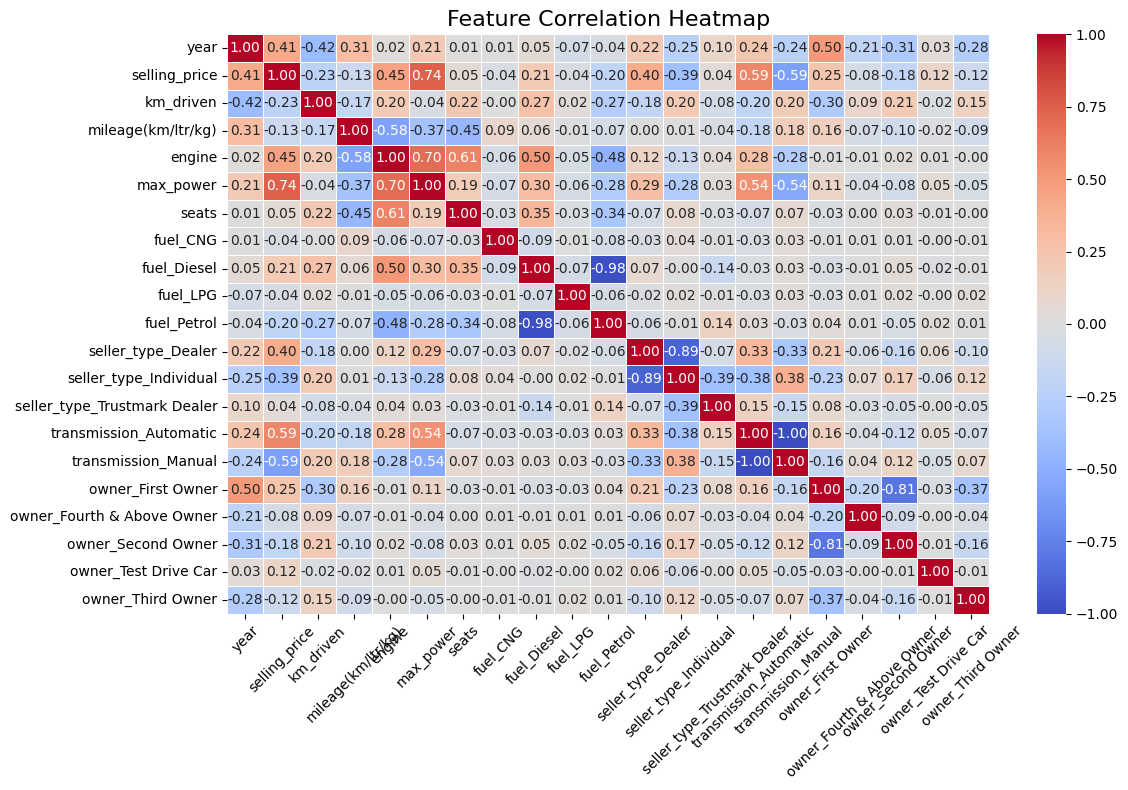

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your processed DataFrame with only numerical features
# Select only numerical columns for correlation calculation
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add a title to the heatmap
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit everything nicely

# Show the plot
plt.show()


In [ ]:
%pip install scikit-learn


  Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl (44.8 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [16]:
from sklearn.preprocessing import StandardScaler
# Normalize numerical features

scaler = StandardScaler()
numerical_cols = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


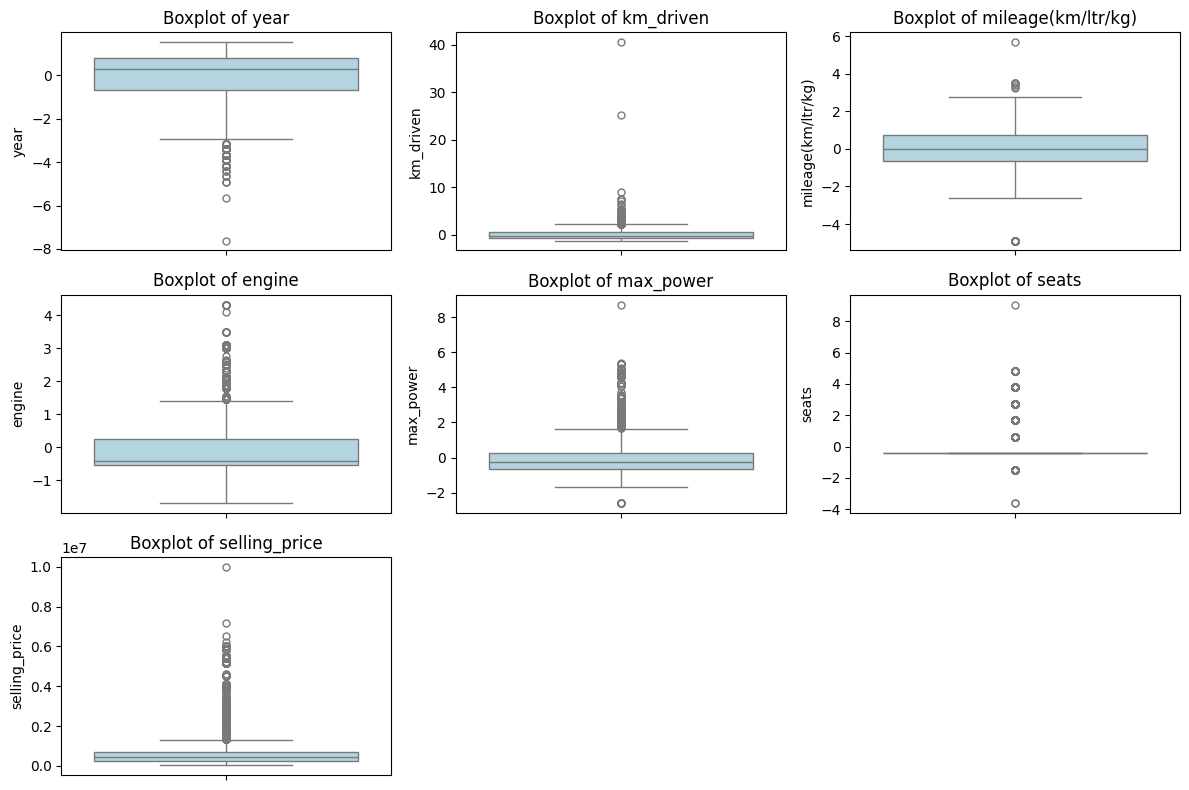

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your processed DataFrame (before splitting into training and test sets)

# List of numerical columns to visualize
numerical_cols = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'selling_price']

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a box plot for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Arrange the plots in a 3x3 grid
    sns.boxplot(data[col], color='lightblue', fliersize=5)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

# Show the plots
plt.show()


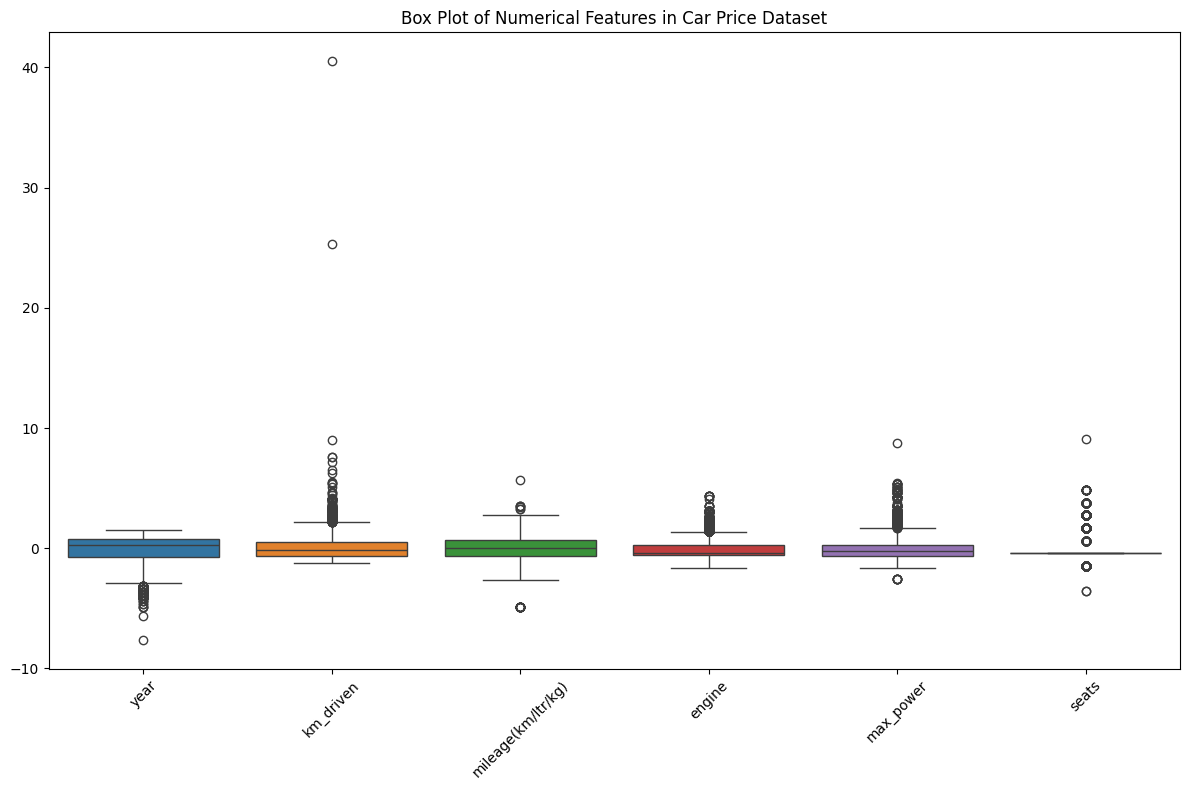

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numerical columns after preprocessing
numerical_cols = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']  # update this list if necessary
data_numerical = data[numerical_cols]

# Step 2: Create a box plot for the entire dataset (all numerical columns)
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_numerical)
plt.title("Box Plot of Numerical Features in Car Price Dataset")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


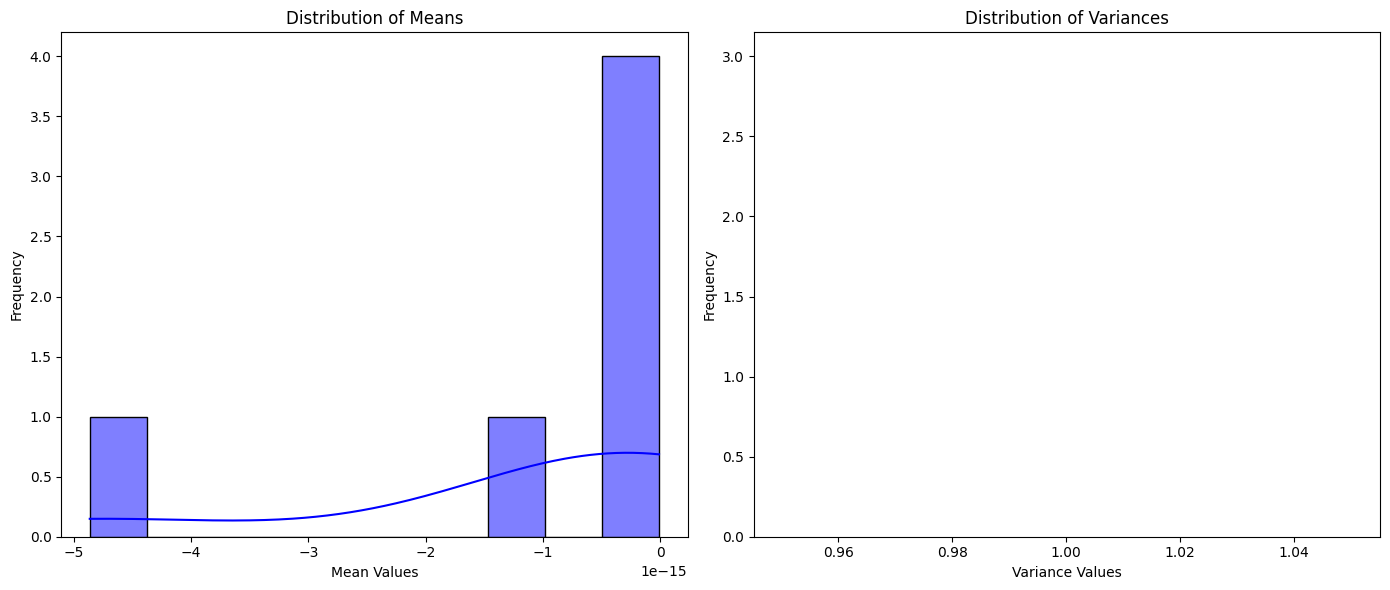

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numerical columns after preprocessing
numerical_cols = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']  # update as needed
data_numerical = data[numerical_cols]

# Step 2: Calculate mean and variance for each numerical column
means = data_numerical.mean()
variances = data_numerical.var()

# Step 3: Visualize the mean and variance distribution

# Create a figure with two subplots for mean and variance distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot mean distribution
sns.histplot(means, kde=True, ax=ax[0], color='blue', bins=10)
ax[0].set_title('Distribution of Means')
ax[0].set_xlabel('Mean Values')
ax[0].set_ylabel('Frequency')

# Plot variance distribution
sns.histplot(variances, kde=True, ax=ax[1], color='red', bins=10)
ax[1].set_title('Distribution of Variances')
ax[1].set_xlabel('Variance Values')
ax[1].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd

# Assuming 'data' is your processed DataFrame and you've already performed preprocessing
numerical_cols = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']  # update as needed

# Select only numerical columns for the statistics
data_numerical = data[numerical_cols]

# Calculate mean and variance
mean_values = data_numerical.mean()
variance_values = data_numerical.var()

# Create a DataFrame to hold the statistics
statistics_df = pd.DataFrame({
    'Mean': mean_values,
    'Variance': variance_values
})

# Display the statistics table
print(statistics_df)


                            Mean  Variance
year               -4.862252e-15  1.000123
km_driven          -5.900792e-17  1.000123
mileage(km/ltr/kg) -1.068262e-15  1.000123
engine             -1.503609e-16  1.000123
max_power          -1.049030e-17  1.000123
seats              -2.167995e-16  1.000123


In [13]:
from sklearn.model_selection import train_test_split
# Step 4: Divide data into training and test sets
X = data.drop(columns=['selling_price'])
y = data['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Print the shapes of the resulting sets
print(f"Training feature set (X_train) shape: {X_train.shape}")
print(f"Test feature set (X_test) shape: {X_test.shape}")
print(f"Training target set (y_train) shape: {y_train.shape}")
print(f"Test target set (y_test) shape: {y_test.shape}")


Training feature set (X_train) shape: (6502, 10)
Test feature set (X_test) shape: (1626, 10)
Training target set (y_train) shape: (6502,)
Test target set (y_test) shape: (1626,)


In [19]:
# Step 5: Model Selection Function
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{model.__class__.__name__} --> R² Score: {acc:.4f}")
    return acc

In [20]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Step 6: Compare Models
models = [
    LinearRegression(),
    Lasso(alpha=0.1),  # Adjust alpha for Lasso
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42, n_estimators=100)
]


In [21]:
# Evaluate each model
model_scores = {}
for model in models:
    score = model_acc(model)
    model_scores[model.__class__.__name__] = score

# Debug: Print model scores
print(f"\nModel scores: {model_scores}")


ValueError: could not convert string to float: 'Petrol'

In [31]:
# Step 7: Print Best Model (Using sorted list to avoid any issues with max)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)
best_model_name, best_model_score = sorted_scores[0]
print(f"\nBest Model: {best_model_name} with R² Score: {best_model_score:.4f}")


Best Model: RandomForestRegressor with R² Score: 0.9678


In [32]:
from sklearn.model_selection import GridSearchCV


# Step 8: Hyperparameter tuning for the best model (RandomForestRegressor in this case)
if best_model_name == "RandomForestRegressor":
    param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'criterion': ['squared_error', 'absolute_error', 'poisson']  # Criterion for splitting nodes
    }

    grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                               param_grid=param_grid,
                               scoring='neg_mean_squared_error',  # Negative MSE to maximize the score
                               cv=5,  # 5-fold cross-validation
                               verbose=2,  # Display detailed results
                               n_jobs=-1)  # Use all available cores for parallel processing

    # Perform the search
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_rf_model = grid_search.best_estimator_

    # Print the best parameters
    print("\nBest Parameters from GridSearchCV:", grid_search.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best Parameters from GridSearchCV: {'criterion': 'squared_error', 'n_estimators': 100}


In [34]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 7: Evaluate the model
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 21098149406.026016
Mean Absolute Error: 70387.01718184091
R² Score: 0.9678128905805897


In [37]:
!pip install matplotlib


  Using cached matplotlib-3.9.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.3-cp311-cp311-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 2.4 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 2.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 2.5 MB/s eta 0:00:01
   --------------------

In [40]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


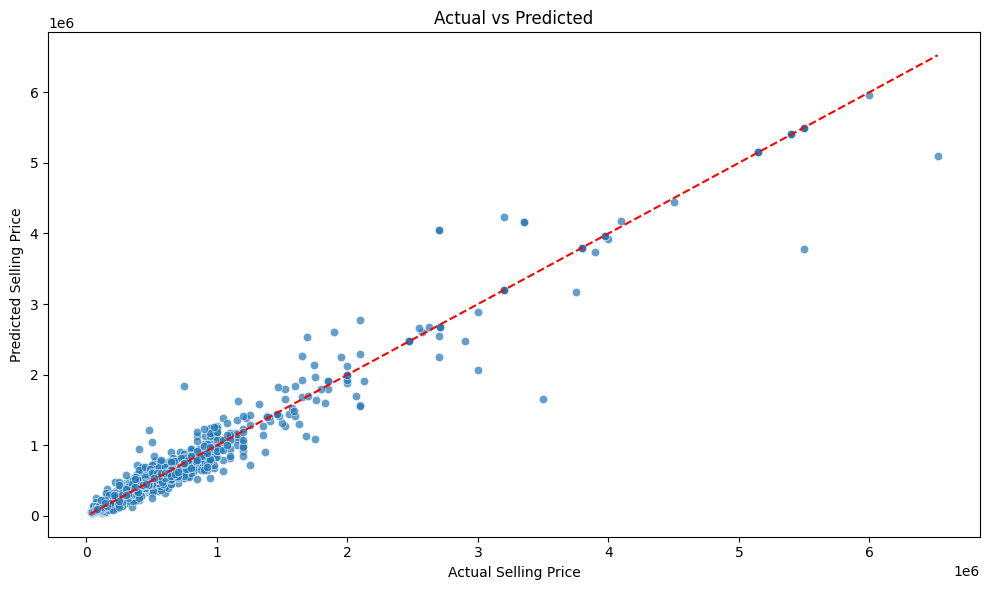

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
# Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.tight_layout()
plt.show()

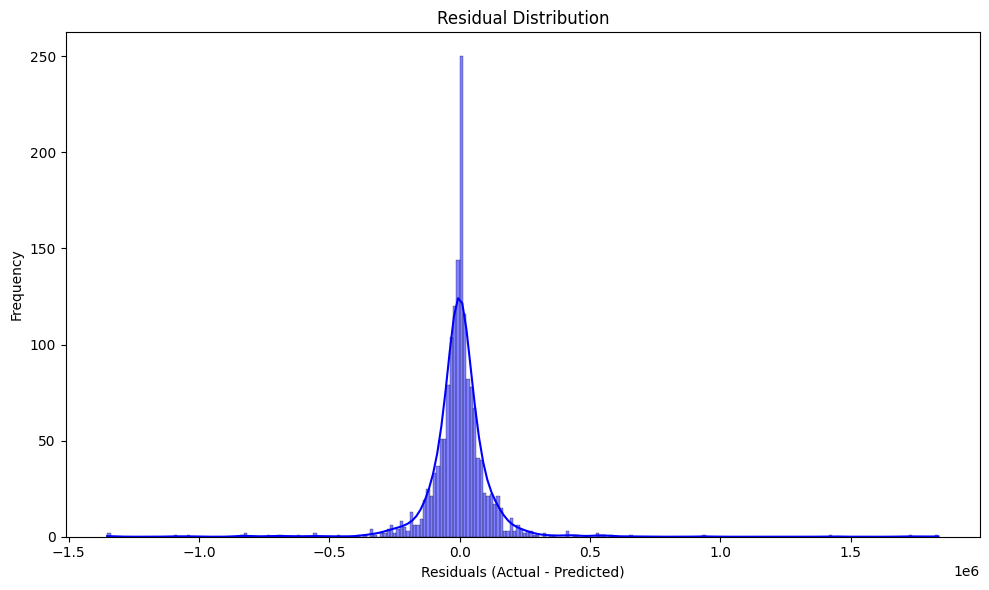

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Residual Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming 'best_rf_model' is the trained Random Forest Regressor model
# And 'X_train' is your training data with the features

# Get feature importance from the model
feature_importance = best_rf_model.feature_importances_

# Create a DataFrame to hold feature names and their importance values
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [43]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_rf_model, file)

In [44]:
X_train.columns

Index(['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [45]:
pred_value = best_rf_model.predict([[2020, 15000, 20, 1197, 85, 5, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]])
pred_value

H:\MLModel\model\mlenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5674100.])